# **Workout Data Analysis Project**
---
### Project Overview

This project analyzes personal workout data to explore the relationship between pre-workout nutrition, hydration, muscle group focus, and workout outcomes. The goal is to derive actionable insights.

### <u>Imports & Setup</u>

In [20]:
import pandas as pd
import sys

sys.path.append('../')

from src.split_preworkout import split_pre_workout
from src.workout_log_analysis import *

### <u>Loading Data</u>
> Two csv files, named exercise_log.csv and session_log.csv are loaded as dataframes.

In [21]:
exercise_df = pd.read_csv("../data/processed/exercise_log.csv")
session_df = pd.read_csv("../data/processed/session_log.csv")

In [22]:
exercise_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   exercise         1372 non-null   object 
 1   weight           1334 non-null   float64
 2   reps             1334 non-null   float64
 3   cardio_duration  38 non-null     float64
 4   date             1372 non-null   object 
 5   muscle_targeted  1372 non-null   object 
dtypes: float64(3), object(3)
memory usage: 64.4+ KB


In [23]:
session_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   date                    110 non-null    object
 1   workout_duration        110 non-null    int64 
 2   workout_avg_heart_rate  110 non-null    int64 
 3   workout_calories_burnt  110 non-null    int64 
 4   preworkout              109 non-null    object
 5   hydration               110 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 5.3+ KB


### <u>Data Preprocessing & Cleaning</u>

> From the above **.info()** done on the dataframes, the status of null & non-null values in all columns is shown.

> This is done to process and clean the null values in the dataframes.

In [24]:
# replace NaN with 0 in exercise_df
exercise_df = exercise_df.fillna(0)

# converting date into datetime format.
exercise_df['date'] = pd.to_datetime(exercise_df['date'], format='%d/%m/%y')

# replace NaN with '' in preworkout
session_df['preworkout'] = session_df['preworkout'].fillna('')

# converting date into datetime format.
session_df['date'] = pd.to_datetime(session_df['date'], format='%d/%m/%y')

In [25]:
exercise_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   exercise         1372 non-null   object        
 1   weight           1372 non-null   float64       
 2   reps             1372 non-null   float64       
 3   cardio_duration  1372 non-null   float64       
 4   date             1372 non-null   datetime64[ns]
 5   muscle_targeted  1372 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 64.4+ KB


In [26]:
session_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    110 non-null    datetime64[ns]
 1   workout_duration        110 non-null    int64         
 2   workout_avg_heart_rate  110 non-null    int64         
 3   workout_calories_burnt  110 non-null    int64         
 4   preworkout              110 non-null    object        
 5   hydration               110 non-null    int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 5.3+ KB


### **The ***split_pre_workout*** function**
- The pre-workout meal information is combined (like 2 bananas & 1 coffee).
- The **split_pre_workout** function is created to break down the combined pre-workout meal information into separate quantity columns for each meal item (banana_qty, apple_qty, coffee_qty, sandwich_qty).
- This ***helps to analyze the impact of each food item individually on workout outcomes***, instead of treating the entire pre-workout as one thing.
- Function is called and the results are stored back into session_df with 4 additional columns (banana_qty, apple_qty, coffee_qty, sandwich_qty).

In [27]:
session_df[['banana_qty', 'apple_qty', 'coffee_qty', 'sandwich_qty']] = (session_df['preworkout'].apply(split_pre_workout))

#### Volume of workout is a product of weights and reps. Adding a new column ***"volume"*** in exercise_df.

In [28]:
exercise_df.insert(loc=3, column='volume', value= exercise_df['weight'] * exercise_df['reps'])
exercise_df.head()

,exercise,weight,reps,volume,cardio_duration,date,muscle_targeted
0,Pull Ups,1.0,7.0,7.0,0.0,2024-05-02,Mix
1,Pull Ups,1.0,3.0,3.0,0.0,2024-05-02,Mix
2,Push Ups,1.0,10.0,10.0,0.0,2024-05-02,Mix
3,Push Ups,1.0,4.0,4.0,0.0,2024-05-02,Mix
4,Bench Press,1.0,12.0,12.0,0.0,2024-05-02,Mix


#### To get the ***"total volume"*** lifted on a particluar date along with the target muscle, running a groupBy on date and muscle targeted columns.
> Hence, creating a new dataFrame ***"volume_per_date"***

In [29]:
volume_per_date = exercise_df.groupby(['date','muscle_targeted'],as_index=False)['volume'].sum()
volume_per_date.rename(columns={'volume':'total_volume'}, inplace=True)  # inplace is TRUE here as same dataFrame is being modified.
volume_per_date.head()

,date,muscle_targeted,total_volume
0,2024-05-02,Mix,321.0
1,2024-05-03,Mix,383.0
2,2024-05-04,Mix,431.5
3,2024-05-05,Mix,832.0
4,2024-05-08,Chest,494.5


#### Merging ***volume_per_date*** dataframe with ***session_df*** dataframe.
> This is to achieve the ***final total_volume*** that be added against a particular date and the workout meal.

In [30]:
analysis_df = pd.merge(volume_per_date,session_df,how = 'left', on = 'date')

### The final dataFrame for analysis is named ***"analysis_df"***.
> Below is what analysis_df contains.

In [31]:
analysis_df.head()

,date,muscle_targeted,total_volume,workout_duration,workout_avg_heart_rate,workout_calories_burnt,preworkout,hydration,banana_qty,apple_qty,coffee_qty,sandwich_qty
0,2024-05-02,Mix,321.0,40,105,276,1 Sandwich,500,0,0,0,1
1,2024-05-03,Mix,383.0,30,103,220,1 Sandwich,500,0,0,0,1
2,2024-05-04,Mix,431.5,35,110,210,1 Apple,500,0,1,0,0
3,2024-05-05,Mix,832.0,40,115,240,1 Sandwich,500,0,0,0,1
4,2024-05-08,Chest,494.5,40,122,235,1 Banana,750,1,0,0,0


---
## **Starting the Analysis**
---

### 1. <u>**Analyze Meal Effect**</u>
**Objective**: Investigate how pre-workout meals impact total workout volume. Also, find what's the best meal & qty for a particular target muscle ***(default: chest)***.

To achieve this, ***analyze_meal_effect*** function is invoked which takes a dataFrame - **analysis_df** as an argument parameter and returns back the results for best pre-workout meal overall and best pre-workout meal for a particular target muscle.

> Default target_muscle is chest, but below in arguments of analyze_meal_effect - ***bicep*** is provided to show results for bicep.

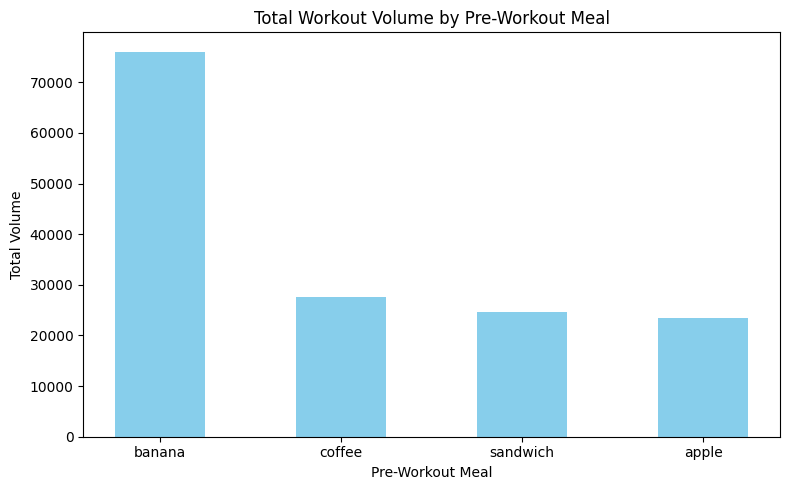

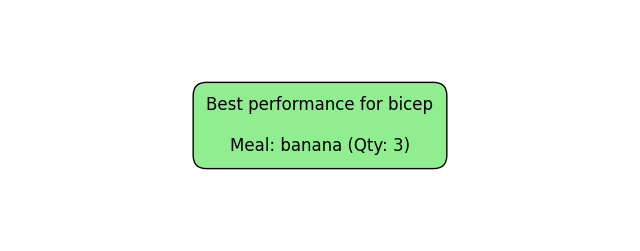

In [32]:
best_pre_workout_meal_overall, best_pre_workout_meal_for_target_muscle = analyze_meal_effect(analysis_df, 'bicep')

**Insights from the Chart** - The chart helps to identify the dietary patterns that maximize performance, guiding pre-workout nutrition choices.

* The bar plot suggests that workouts preceded by **banana** consumption result in the highest cumulative volume lifted. This is possibly due to its **quick digesting carbs providing energy**.
* For muscle specific meal (e.g., best performance for bicep) the result suggests, that **3 bananas** are optimal. It indicates that the energy profile of bananas suits the high-intensity demands of bicep workout.

### 2. <u>**Analyze Muscle Training**</u>
**Objective**: Examine the frequency of training for different muscle groups and identify the most and least trained muscles, along with their most & least frequently performed exercises.

To achieve this, ***analyze_muscle_training*** function is invoked which takes a dataFrame - **exercise_df** as an argument parameter and returns back the results for least trained muscle and most trained muscle. Along with this it also returns the exercise frequency for least trained muscle and exercise frequency for most trained muscle.

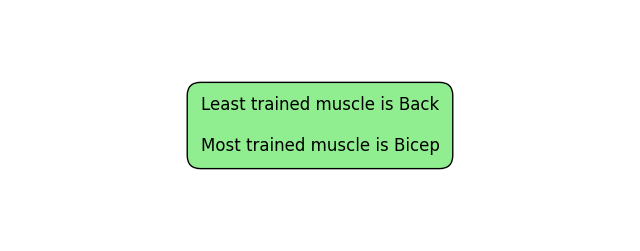

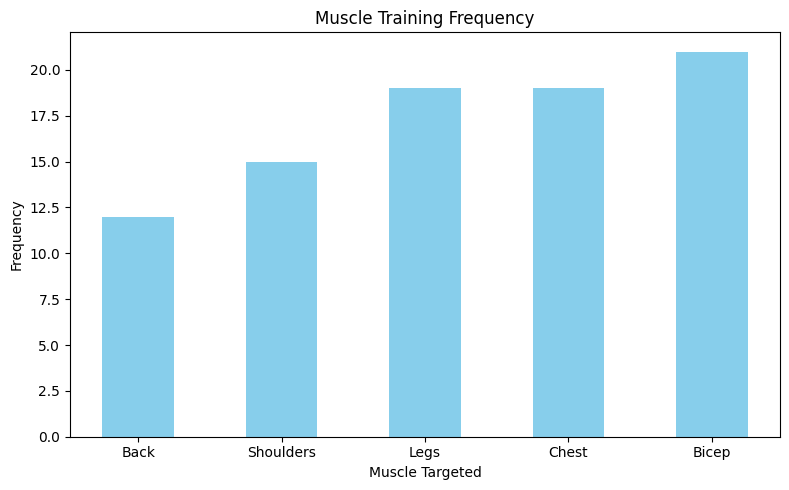

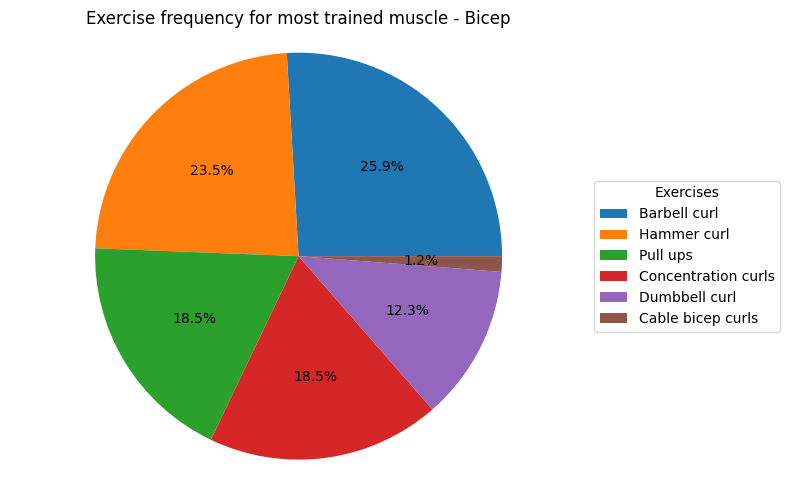

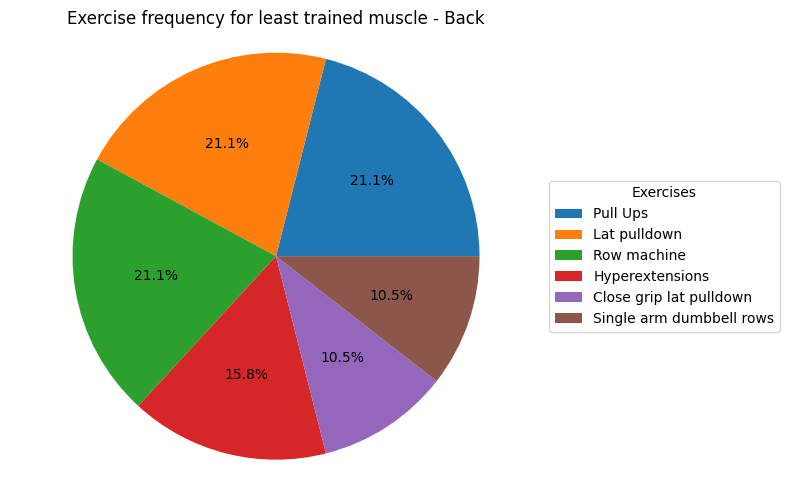

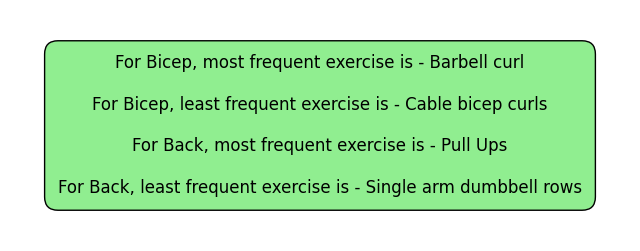

In [33]:
least_trained_muscle, most_trained_muscle, exercise_freq_for_least_trained, exercise_freq_for_most_trained = analyze_muscle_training(exercise_df)

**Insights from the Charts**
- The Muscle Training Frequency bar plot highlights imbalances in training focus. **"Back" muscle** has a significantly shorter bar than **"Bicep" muscle**. This indicates there's a great preference for bicep workout possibly due to aesthetic goals(😅) and gaining strength.
- The Pie Charts highlights the most and least frequent exercises performed for the least trained muscle - **Back** and most trained muscle - **Bicep**.
This indicates, **Barbell curl** dominates Bicep workout and **Pull Ups** dominates Back workout.
- The insights overall suggests that variety and focus is needed for the least trained muscle to improve engagement.

### 3. <u>**Track Progress by Phase**</u>
**Objective**: Monitor workout progress over time by calculating cumulative average volume and average volume per three-month phase.

To achieve this, ***track_progress_by_phase*** function is invoked which takes a dataFrame - **analysis_df** as an argument parameter and returns back the results for cumulative and phase averages.

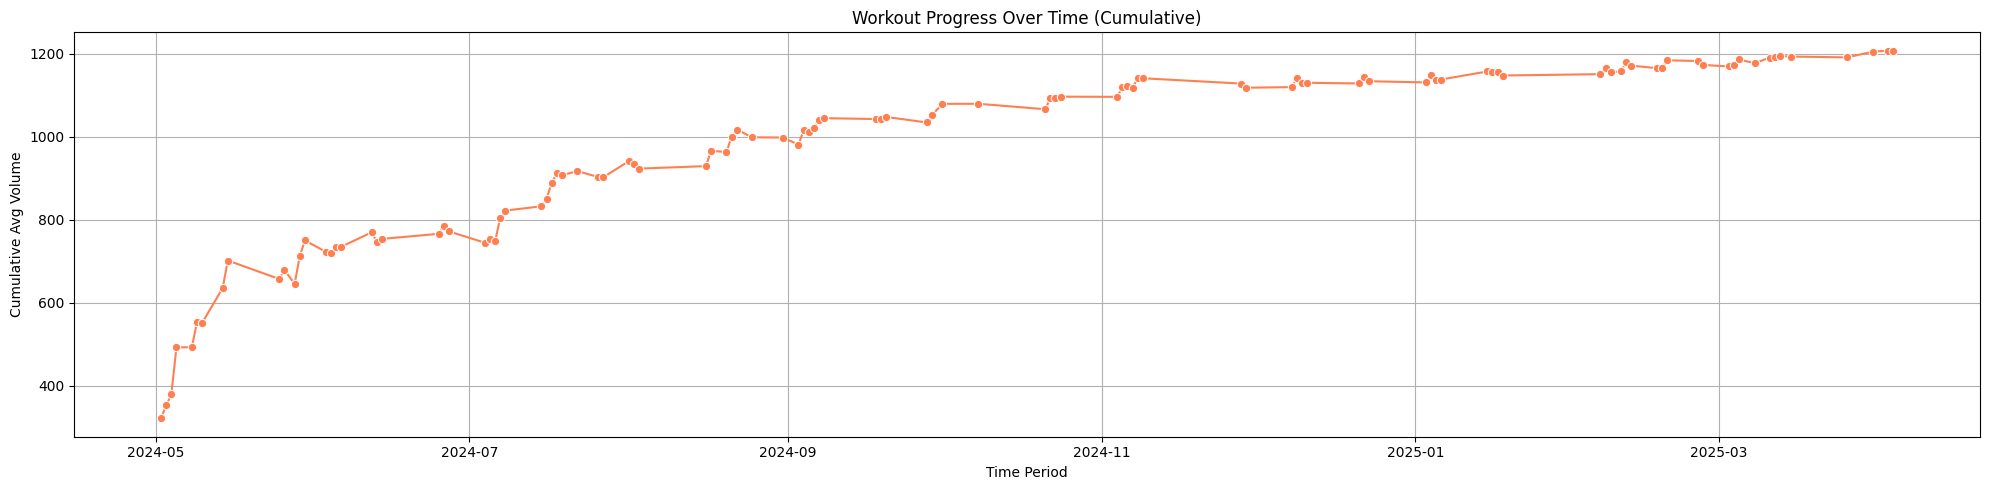

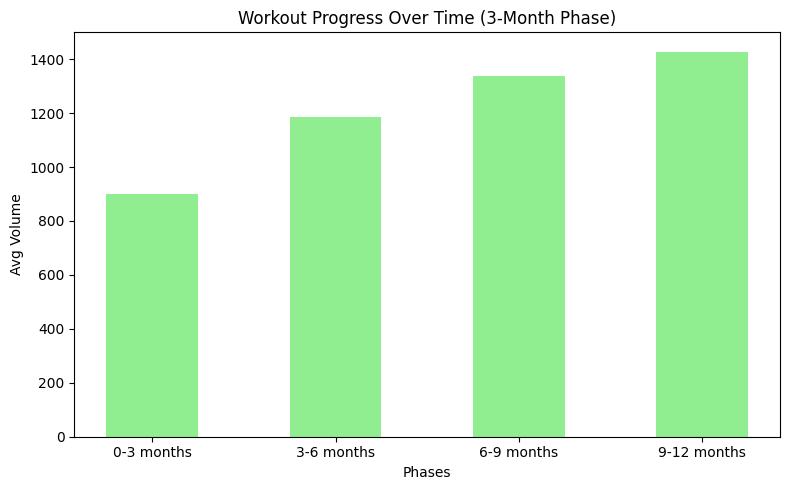

In [34]:
progress_over_time = track_progress_by_phase(analysis_df)

**Insights from the Charts** - The charts provide a long term view of progress, helping identify whether the training program is effective or needs adjustment.
- The Workout Progress Over Time (Cumulative) line plot shows an ***upward trend*** which suggests consistent improvement in lifting capacity. However, **dips may indicate stalls**. For example, a steep increase early on could reflect beginner gains.
- The Workout Progress Over Time (3-Month Phase) bar plot compares average volume across phases. Later phases **"9-12 months"** have taller bars than earlier ones **"0-3 months"**. This confirms strength gains over time.
- The insights overall suggests that the training program is effective. However, dips suggest that some adjustment is required in training intensity.

### 4. <u>**Analyze Hydration Impact during workout** </u>
**Objective**: Evaluate how hydration levels affect workout performance, measured as volume per minute.

To achieve this, ***analyze_hydration_impact*** function is invoked which takes a dataFrame - **analysis_df** as an argument parameter and returns back the results for water intake during workout on the overall performance.

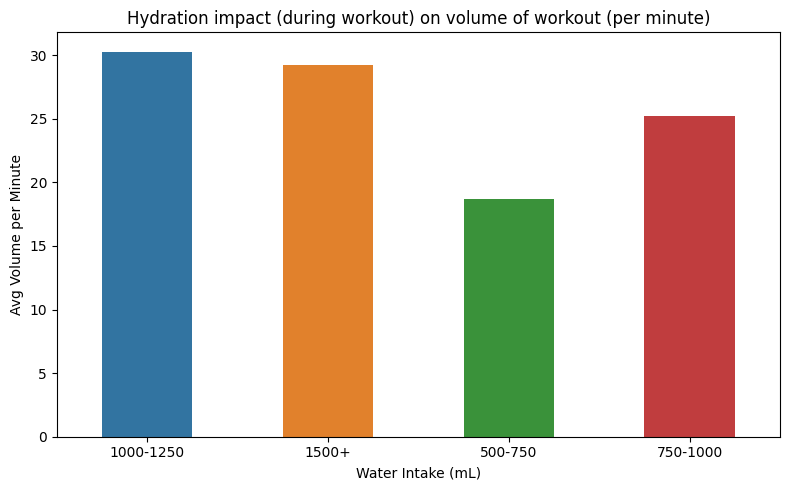

In [35]:
hydartion_impact = analyze_hydration_impact(analysis_df)

**Insights from the Chart**
- For higher hydration levels **1000-1250 mL**, taller bar suggests that increased water intake during workout enhances performance, possibly by improving endurance or recovery.
- For lower hydration levels **500-750 mL** shorter bar indicates that insufficient water intake during workout impairs performance, possibly due to fatigue or reduced muscle contraction efficiency.
- The bar however, plateaus beyond a certain level **1250+ mL**. This ***indicates a performance ceiling where*** **additional hydration yields diminishing returns**.

### 5. <u>**Correlate Calories by Muscle Group** </u>
**Objective**: Analyze the average calories burned per workout for different muscle groups.

To achieve this, ***correlate_calories_by_muscle*** function is invoked which takes a dataFrame - **analysis_df** as an argument parameter and returns back the results for avg calories burned for different muscle groups.

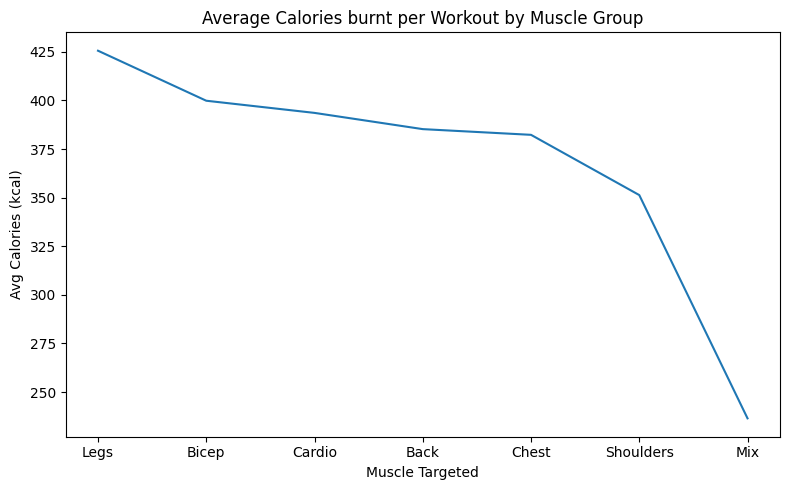

In [36]:
muscle_calories = correlate_calories_by_muscle(analysis_df)

**Insights from the Chart**
- Average Calories burnt per Workout by Muscle Group line plot highlights **Leg muscle burns the most calories** per workout. It reflects the high energy demands of leg workout maximizes calorie expenditure for weight loss goals.
- A **Mix Workout**, however, **burns the least calories** per workout.
- The insights overall suggests Leg-focused sessions not only require more exertion, but they also top the charts for calorie burn — consistently outperforming upper body workouts.

### 6. <u>**Detect Stall Points**</u>
**Objective**: Identify plateaus in weight progression for a specific exercise and muscle group.

To achieve this, ***detect_stall_points*** function is invoked which takes a dataFrame - **exercise_df** as an argument parameter and returns back the results for stall points identified for a specific exercise in a muscle group.

> Default exercise is Lat pulldown and muscle group is Back, but below in arguments of detect_stall_points - exercise ***Leg press*** and muscle ***Legs*** is provided to show results.

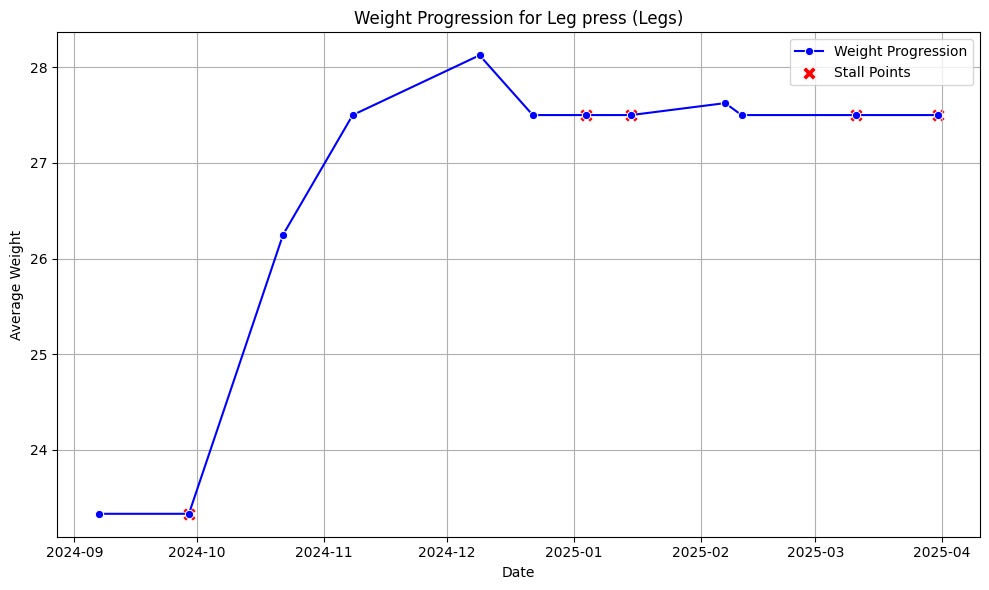

In [37]:
stall_point = detect_stall_points(exercise_df,exercise_name='Leg press',muscle_group='Legs')

**Insights from the Chart**
- The line plot shows the overall trend indicates progression (upward) or regression (downward) in weight lifted for **Leg press**.
- Plateaus in the line - especially where **red scatter points cluster**, suggests periods of stalled strength gains. It could be due to insufficient overload or recovery.

### 7. <u>**Compare Cardio vs. Strength**</u>
**Objective**: Compare cardio and strength workouts based on average heart rate and calories burned, including trends over time (months for now).

To achieve this, ***compare_cardio_strength*** function is invoked which takes a dataFrame - **analysis_df** as an argument parameter and returns back the results for comparison of cardio vs strenght workout and the trend over months.

  focus_type  workout_avg_heart_rate  workout_calories_burnt
0     Cardio              136.850000              393.600000
1   Strength              130.133333              384.288889


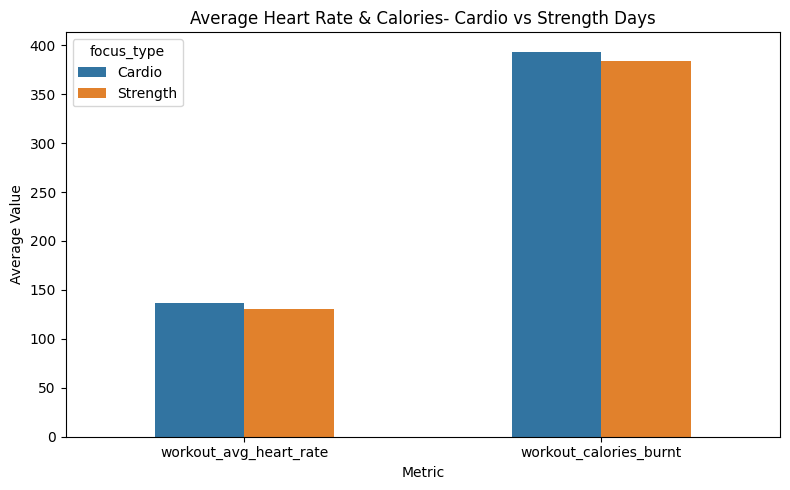

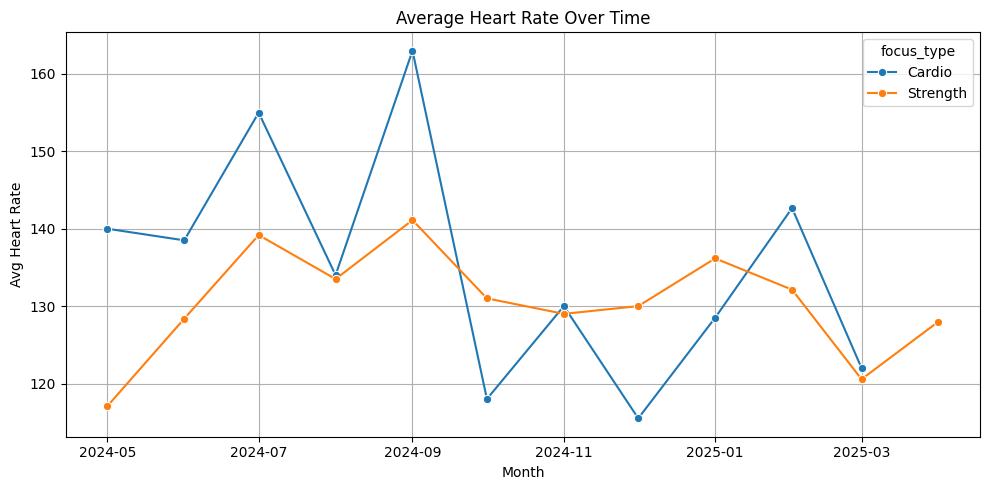

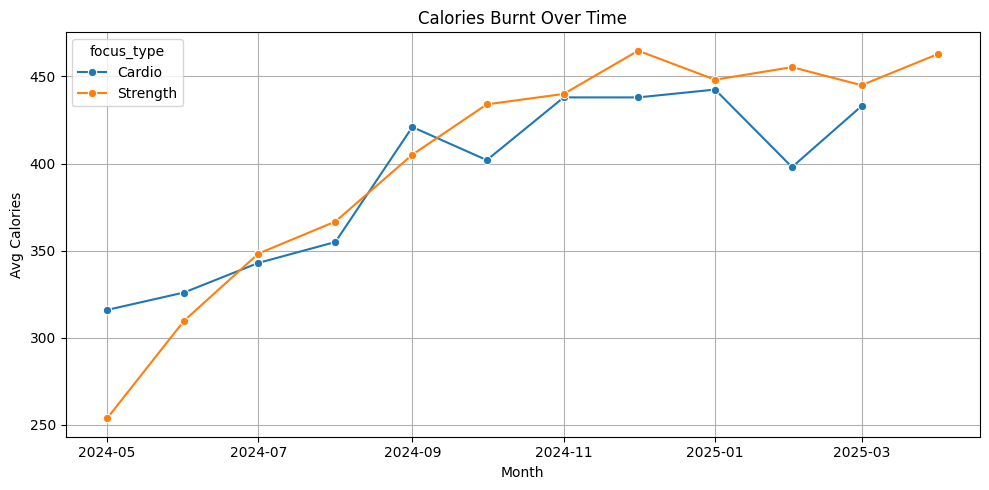

In [38]:
strength_trend = compare_cardio_strength(analysis_df)

**Insights from the Charts**
- Average Heart Rate & Calories bar plot compares Cardio and Strength workouts directly.
    > Higher heart rate bar for cardio indicates that it elevates heart rate more.

    > Higher calorie bar for cardio indicates that it burns more fat for weight loss.

- The heart rate line plot tracks how average heart rate evolves monthly.
    > Cardio heart rates remain consistently high and Strength heart rates are rising. This indicates increasing workout intensity.

- The calories line plot shows calorie burn trends.
    > Strength workouts show an upward trend, it reflects increasing volume or intensity is good for calorie burn.